In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import NeuralNets as NN_
#import NeuralNets_cython as NN
import pytorch_NN as PyNN
import pandas as pd

### Load clean and normalize data

In [2]:
minst_train = pd.read_csv("mnist_train.csv").to_numpy()
yactual_uncleaned = minst_train[:,0:1].flatten()
xactual = minst_train[:,1:]/255
yactual = np.zeros((60000,10))

In [3]:
for i,y in enumerate(yactual_uncleaned):
    yactual_temp = np.zeros(10)
    yactual_temp[y] = 1
    yactual[i] = yactual_temp
xactual = torch.from_numpy(xactual).to(dtype = torch.float32)
yactual = torch.from_numpy(yactual).to(dtype = torch.float32)


## Split data

In [4]:
data_set  = PyNN.CustomDataset(xactual,yactual)
train,test = random_split(data_set,[int(.95 * len(data_set)),int(0.05 * len(data_set))])
num_epochs = 30
dataset_size = 60000
batch_size = 1000
MSE_history = []
data_loader_train = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

### Add parameters

In [5]:
input_dim = 784
output_dim = 10
num_hidden_layers = 4
nodes_per_layer = 650
minibatch_sz = batch_size
model = PyNN.NeuralNetwork(input_dim, nodes_per_layer, output_dim) # Create model
optimizer = optim.Adam(model.parameters(),lr=.0005)
error_list = []
percent = [1]

### Main Loop

In [6]:
CEL = 0
for epoch in range(0, num_epochs-1):
    count = 0
    if epoch % 10 == 0:
        NN_.save_state(test,"epoch"+str(epoch),directory="checkpointsPyTorch")
    
    for batch_x, batch_y in data_loader_train:
        print("[epoch: "+str(epoch)+" Batch: "+str(count)+" ]  -----> Loss: "+str(CEL)+ "; Percent correct: "+str(percent[-1]))
        output = model(batch_x)
        criterion = nn.CrossEntropyLoss()
        loss = criterion(output, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Get MSE
        error_list.append(loss.item())
        if count%batch_size//10==0:
            percent.append(NN_.validate_data(output.detach().numpy(),batch_y.detach().numpy()))
        count+=1
       
   

[epoch: 0 Batch: 0 ]  -----> Loss: 0; Percent correct: 1
[epoch: 0 Batch: 1 ]  -----> Loss: 0; Percent correct: 10.0
[epoch: 0 Batch: 2 ]  -----> Loss: 0; Percent correct: 52.1
[epoch: 0 Batch: 3 ]  -----> Loss: 0; Percent correct: 52.1
[epoch: 0 Batch: 4 ]  -----> Loss: 0; Percent correct: 53.800000000000004
[epoch: 0 Batch: 5 ]  -----> Loss: 0; Percent correct: 52.1
[epoch: 0 Batch: 6 ]  -----> Loss: 0; Percent correct: 54.7
[epoch: 0 Batch: 7 ]  -----> Loss: 0; Percent correct: 47.099999999999994
[epoch: 0 Batch: 8 ]  -----> Loss: 0; Percent correct: 41.6
[epoch: 0 Batch: 9 ]  -----> Loss: 0; Percent correct: 40.300000000000004
[epoch: 0 Batch: 10 ]  -----> Loss: 0; Percent correct: 34.0
[epoch: 0 Batch: 11 ]  -----> Loss: 0; Percent correct: 34.0
[epoch: 0 Batch: 12 ]  -----> Loss: 0; Percent correct: 34.0
[epoch: 0 Batch: 13 ]  -----> Loss: 0; Percent correct: 34.0
[epoch: 0 Batch: 14 ]  -----> Loss: 0; Percent correct: 34.0
[epoch: 0 Batch: 15 ]  -----> Loss: 0; Percent correct: 

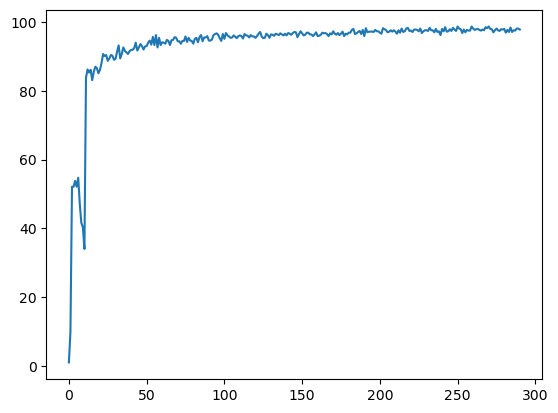

In [7]:
plt.plot(percent)